<a href="https://colab.research.google.com/github/Thamindu17/google-colab/blob/main/pill_counter_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Make sure you have the necessary libraries installed
!pip install roboflow ultralytics -q

from roboflow import Roboflow

# IMPORTANT: Use your NEW API Key here
rf = Roboflow(api_key="Z2BdotJhyaVVEojm45J8")
project = rf.workspace("ml-jk4d2").project("pill-count-goeks")
version = project.version(1)

# This downloads your data in YOLOv8 format
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 59.1 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to pill-count-1 in yolov8:: 100%|██████████| 236/236 [00:00<00:00, 8140.06it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model (yolov8n.pt is small and fast)
model = YOLO('yolov8n.pt')

# Train the model using your dataset from Roboflow
# The 'dataset.location' variable points to the folder with your data.yaml file
results = model.train(
    data=f'{dataset.location}/data.yaml',
    epochs=50,  # Number of times to train on the full dataset
    imgsz=640   # Image size for training
)

Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/pill-count-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pos

Please upload a new image of pills to count:


Saving photo-1628771065518-0d82f1938462.jpg to photo-1628771065518-0d82f1938462.jpg

image 1/1 /content/photo-1628771065518-0d82f1938462.jpg: 448x640 36 pills, 38.6ms
Speed: 2.5ms preprocess, 38.6ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)

✅ Total pills counted: 36


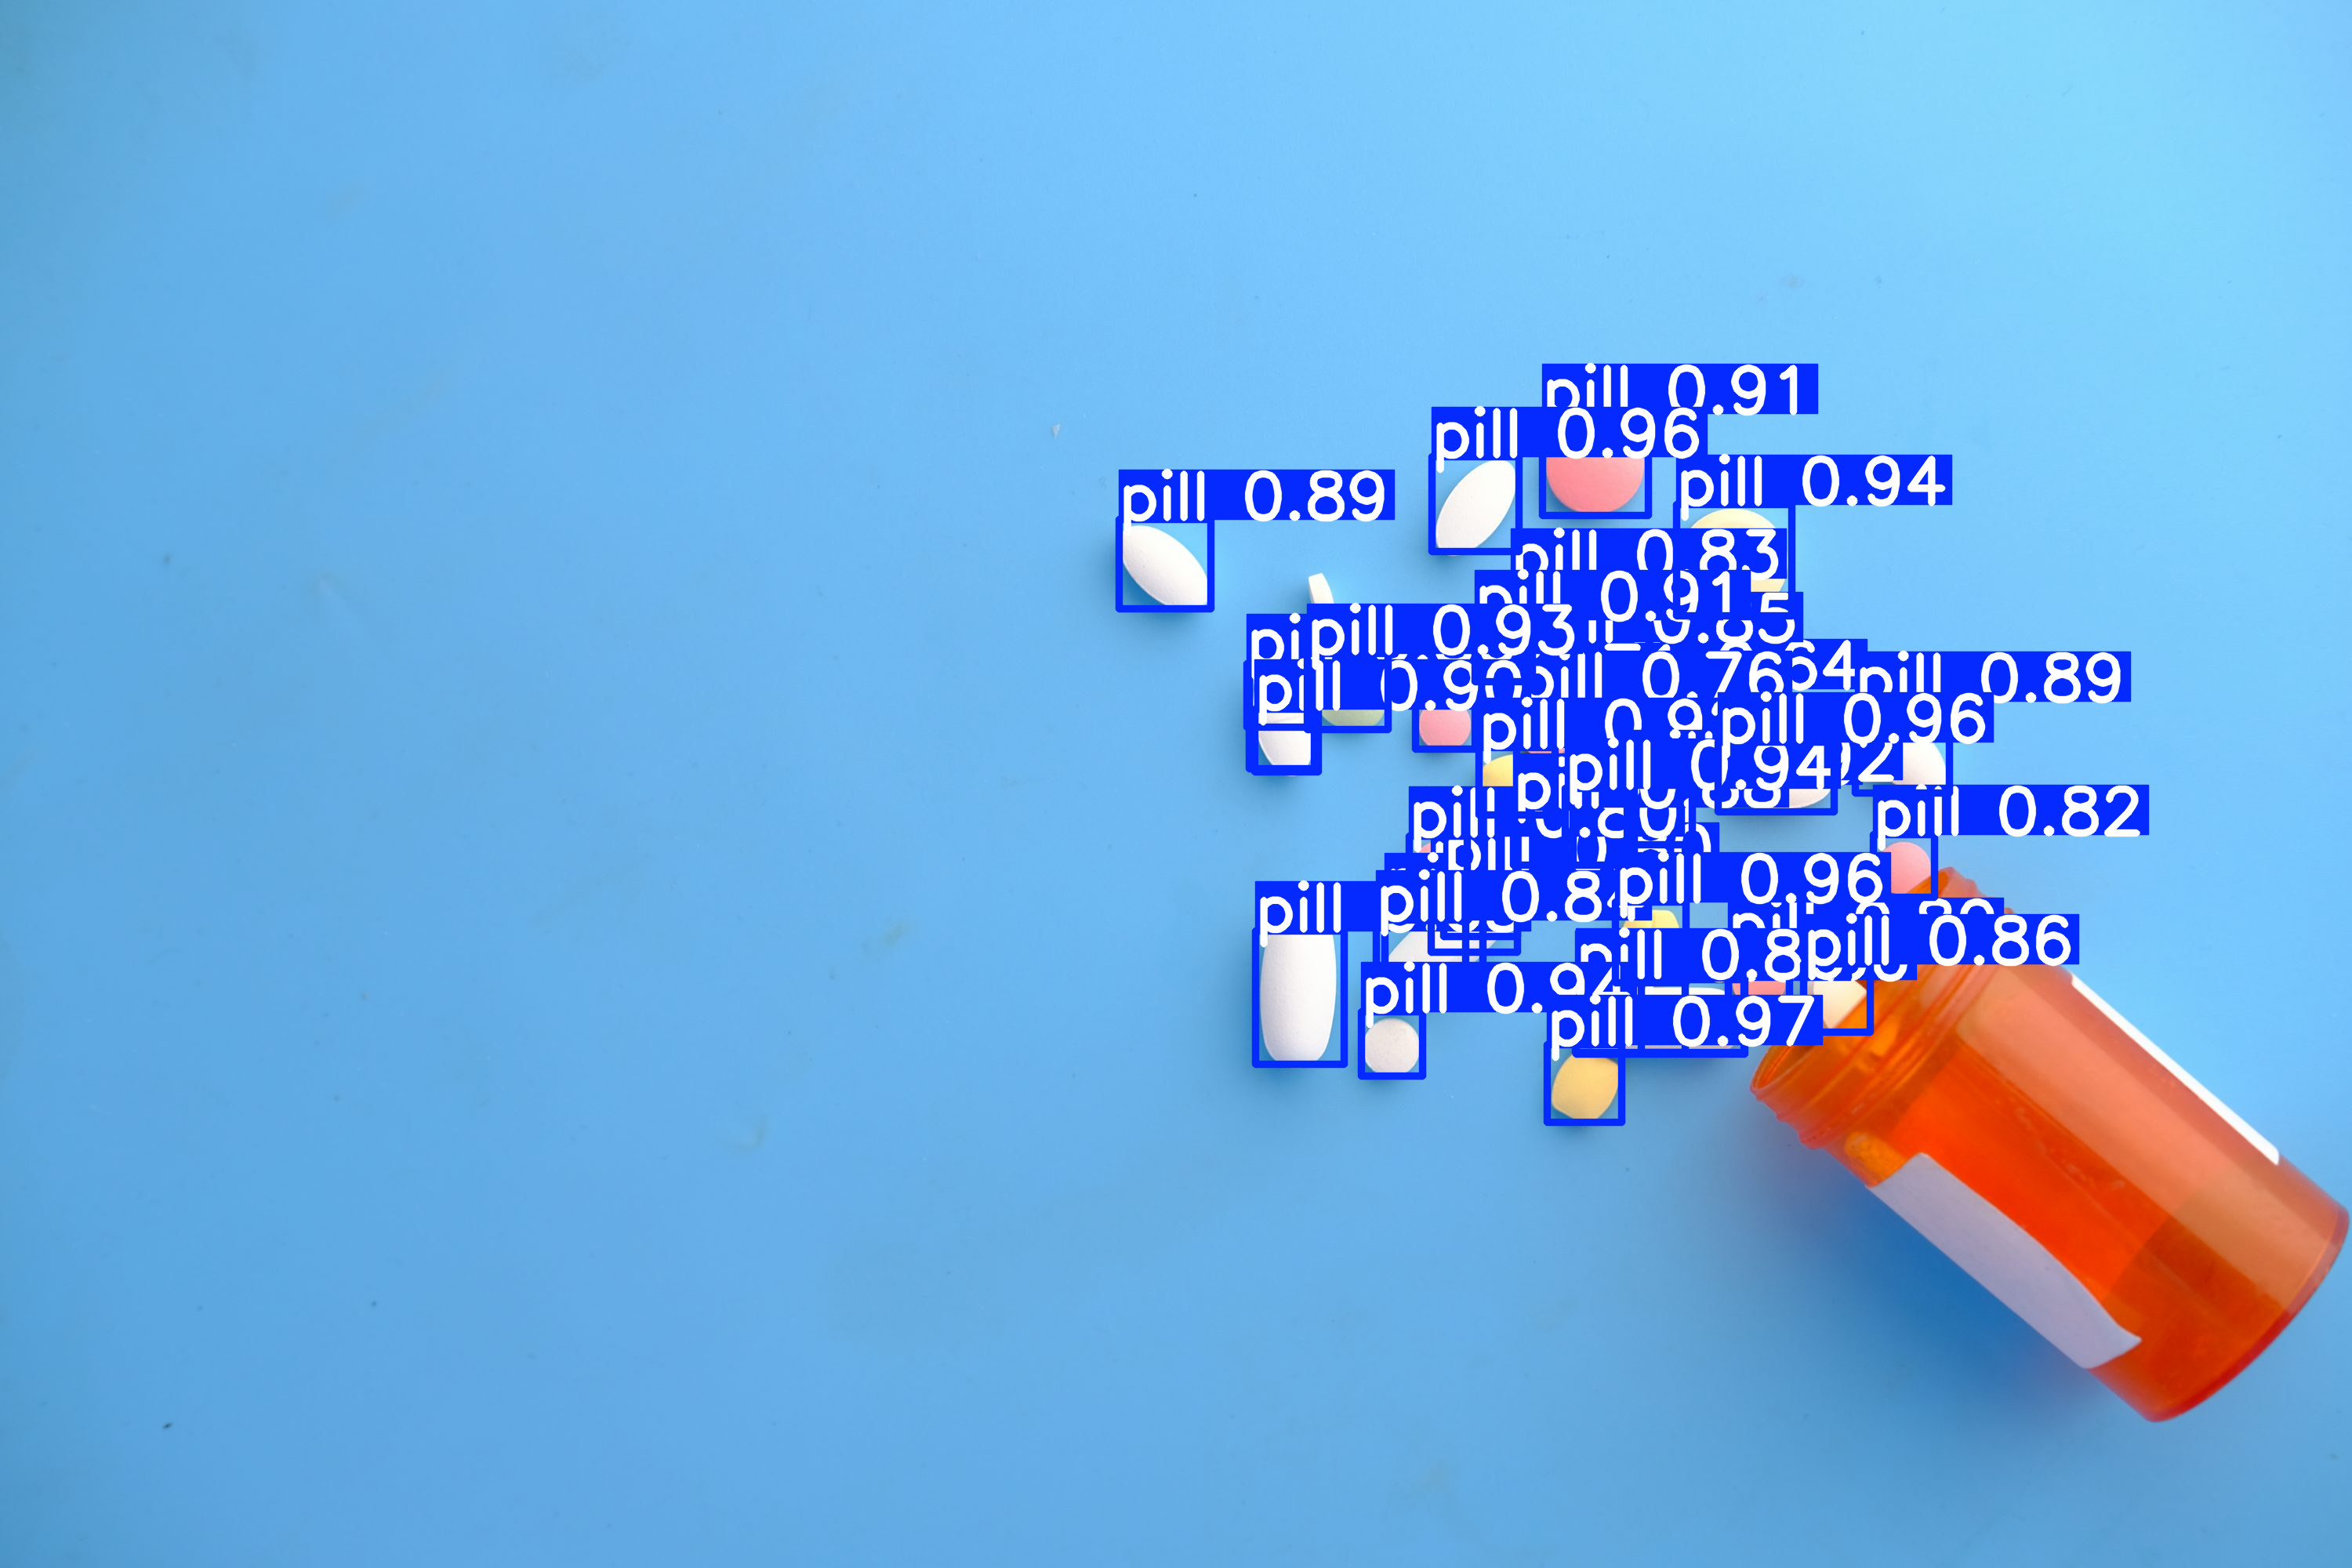

In [ ]:
from google.colab import files
import cv2
from google.colab.patches import cv2_imshow

# Load your custom-trained model
# The path might be slightly different, check the output from the training step
trained_model = YOLO('runs/detect/train/weights/best.pt')

# Upload a new image to test
print("Please upload a new image of pills to count:")
uploaded = files.upload()

if uploaded:
    image_filename = next(iter(uploaded))

    # Run prediction
    results = trained_model.predict(image_filename, conf=0.5) # Use a confidence threshold

    # Draw the results on the image
    annotated_image = results[0].plot()
    pill_count = len(results[0].boxes)

    # Display the count and the image
    print(f"\n✅ Total pills counted: {pill_count}")
    cv2_imshow(annotated_image)